In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\Thanush\Downloads\HR_Data_MNC_Data Science Lovers.csv")
df.head()


,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df['country']=df['Location'].apply(lambda x: x.split(",")[-1].strip())
top_country=df['country'].value_counts().head(10).index
top_country

Index(['Congo', 'Korea', 'Sri Lanka', 'Switzerland', 'British Virgin Islands',
       'Iceland', 'New Zealand', 'Lesotho', 'Peru', 'Malaysia'],
      dtype='object', name='country')

In [5]:
df[df['country'].isin(top_country)].groupby('country')['Salary_INR'].mean().sort_values(ascending=False)

country
Peru                      904003.157079
Iceland                   902012.203560
Lesotho                   899513.470983
Korea                     898259.260055
New Zealand               897526.213969
Malaysia                  897117.431936
British Virgin Islands    894125.502448
Congo                     894028.581235
Sri Lanka                 892138.326317
Switzerland               885697.573472
Name: Salary_INR, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Employee_ID         object
 1   Full_Name           object
 2   Department          object
 3   Job_Title           object
 4   Hire_Date           object
 5   Location            object
 6   Performance_Rating  int64 
 7   Experience_Years    int64 
 8   Status              object
 9   Work_Mode           object
 10  Salary_INR          int64 
 11  country             object
dtypes: int64(3), object(9)
memory usage: 183.1+ MB


In [8]:
df['Hire_Date']=pd.to_datetime(df['Hire_Date'])

In [9]:
df['Experience_Years'].value_counts()

Experience_Years
3     200522
2     199924
4     199866
1     199162
0     198775
6     160410
9     160223
8     160212
5     160112
7     159005
10     41209
13     40149
11     40146
14     40005
12     39709
15       571
Name: count, dtype: int64

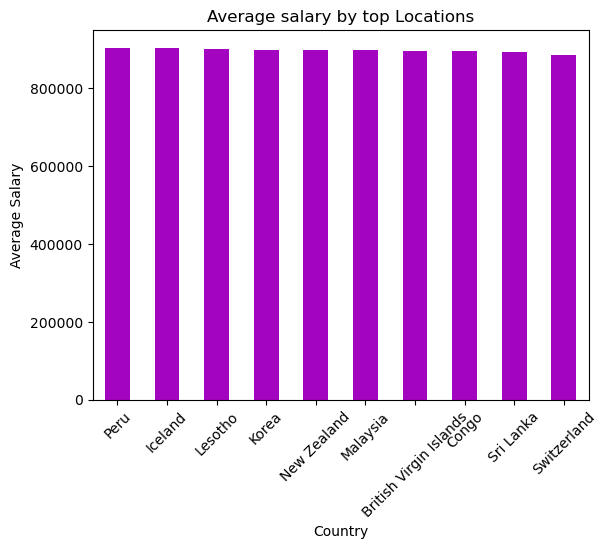

In [10]:
# Average Salary by Top Locations ( bar chart )

df[df['country'].isin(top_country)].groupby('country')['Salary_INR'].mean().sort_values(ascending=False).plot(kind='bar',color='#a304bf')
plt.title('Average salary by top Locations')
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

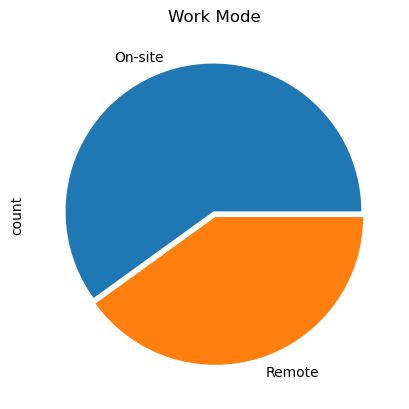

In [11]:
# Work Mode ( Pie chart )

df['Work_Mode'].value_counts().plot(kind='pie',explode=(0.02,0.02))
plt.title("Work Mode")
plt.show()

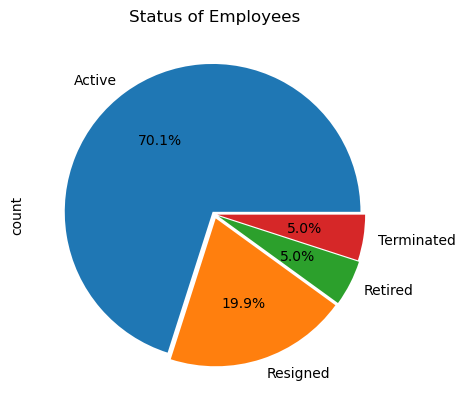

In [13]:
# Status of Employee( Pie chart )
df['Status'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.02,0.03,0.03,0.02))
plt.title('Status of Employees')
plt.show()

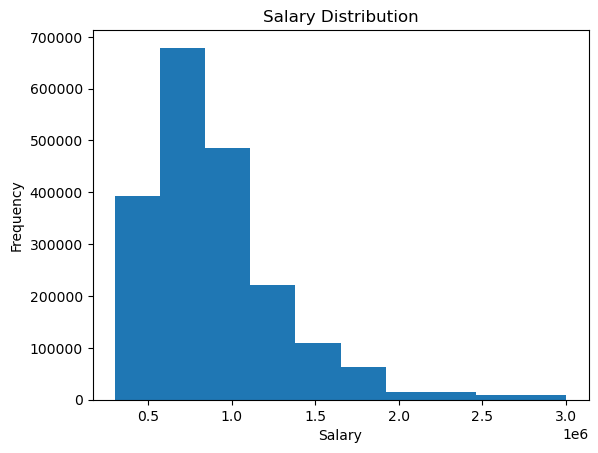

In [14]:
# Salary Distrubution ( histogram )

plt.hist(df['Salary_INR'])
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

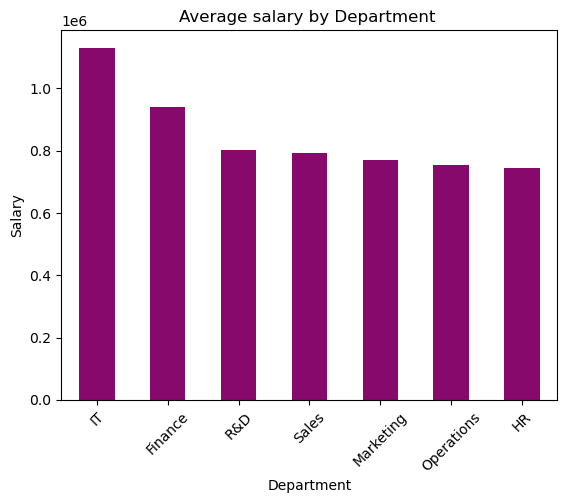

In [15]:
# Average salary by Department ( Bar chart )

dep_salary=df.groupby("Department")["Salary_INR"].mean().sort_values(ascending=False).plot(kind='bar',color='#87096c')
plt.xticks(rotation=45)
plt.title("Average salary by Department ")
plt.xlabel("Department")
plt.ylabel("Salary")
plt.show()

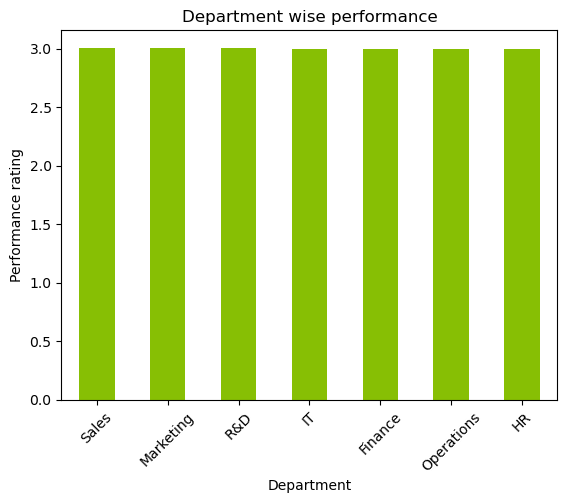

In [16]:
# Department wise Performance ( Bar chart )

df.groupby('Department')['Performance_Rating'].mean().sort_values(ascending=False).plot(kind='bar',color='#87bf04')
plt.title('Department wise performance')
plt.xlabel('Department')
plt.ylabel('Performance rating')
plt.xticks(rotation=45)
plt.show()

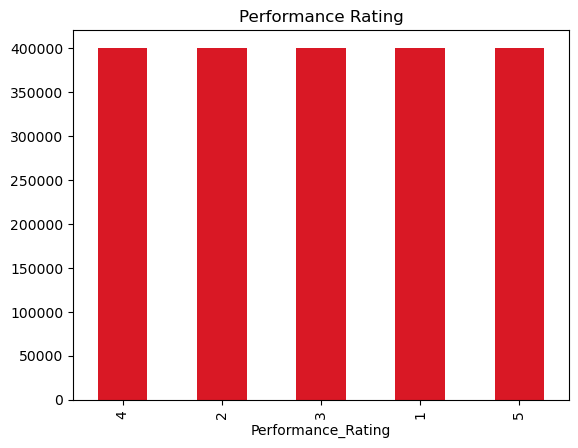

In [17]:
# Performance Rating ( Bar chart )
df['Performance_Rating'].value_counts().plot(kind='bar',color='#d91825')
plt.title('Performance Rating')
plt.show()

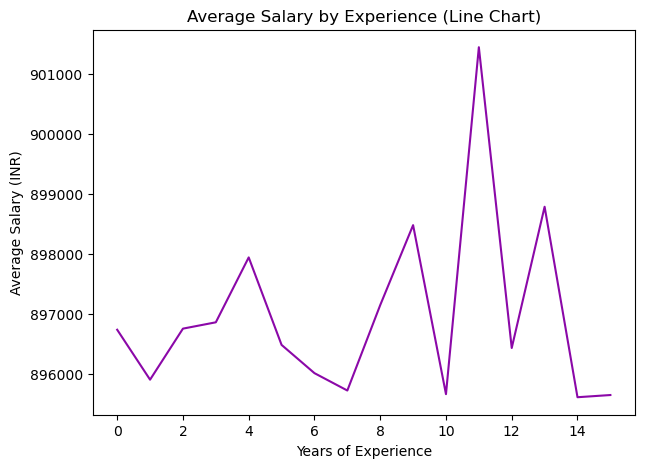

In [18]:
# Average Salary by Experience ( Line chart )

exp_salary = df.groupby('Experience_Years')['Salary_INR'].mean()

plt.figure(figsize=(7,5))
plt.plot(exp_salary.index, exp_salary.values,color='#8b08a8')
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary (INR)")
plt.title("Average Salary by Experience (Line Chart)")
plt.show()

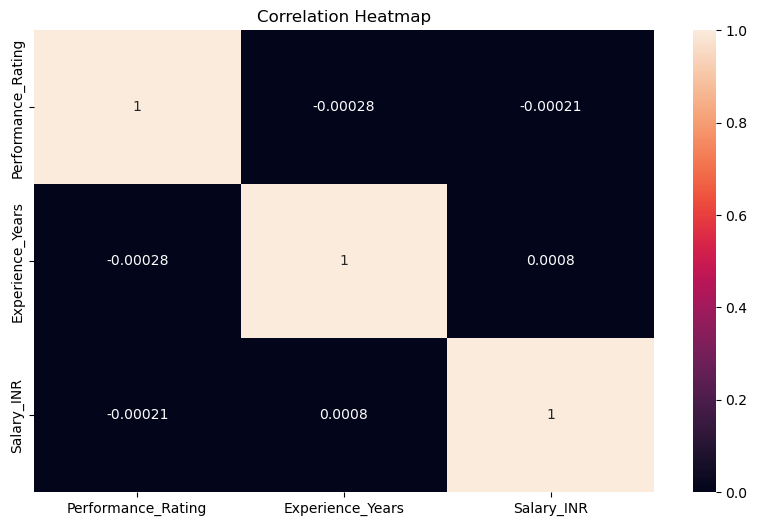

In [19]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

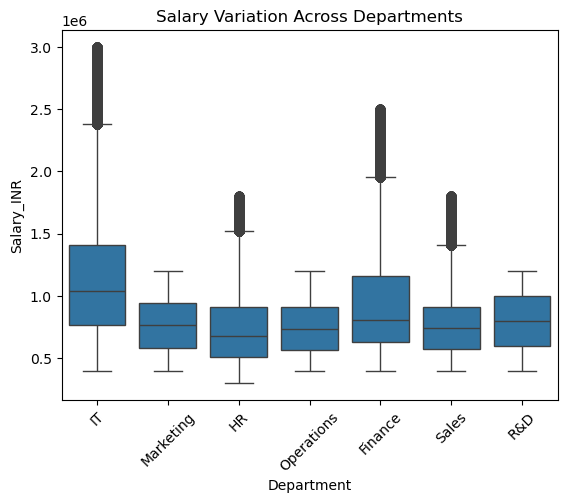

In [20]:
sns.boxplot(x='Department', y='Salary_INR', data=df)
plt.title("Salary Variation Across Departments")
plt.xticks(rotation=45)
plt.show()

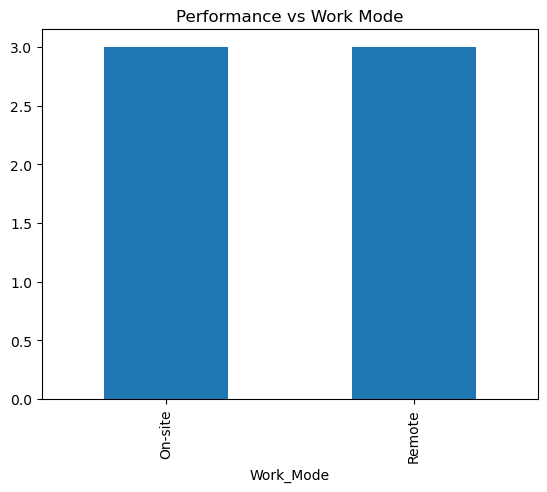

In [21]:
# Performance Rating by Work Mode
df.groupby('Work_Mode')['Performance_Rating'].mean().plot(kind='bar')
plt.title("Performance vs Work Mode")
plt.show()

In [22]:
df['Status'].value_counts(normalize=True) * 100

Status
Active        70.0779
Resigned      19.9330
Retired        4.9956
Terminated     4.9935
Name: proportion, dtype: float64

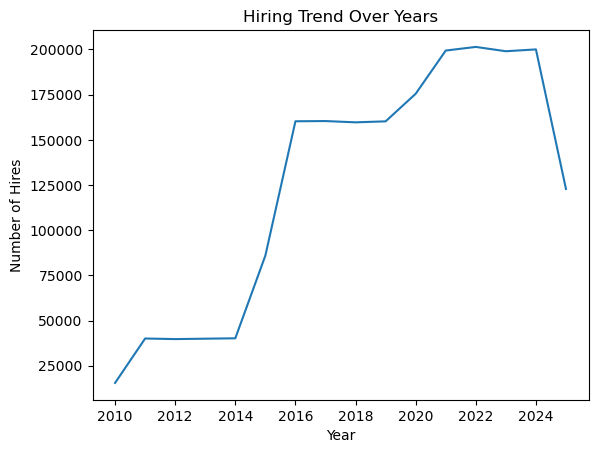

In [27]:
df['Year'] = pd.to_datetime(df['Hire_Date']).dt.year
df['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Number of Hires")
plt.title("Hiring Trend Over Years")
plt.show()

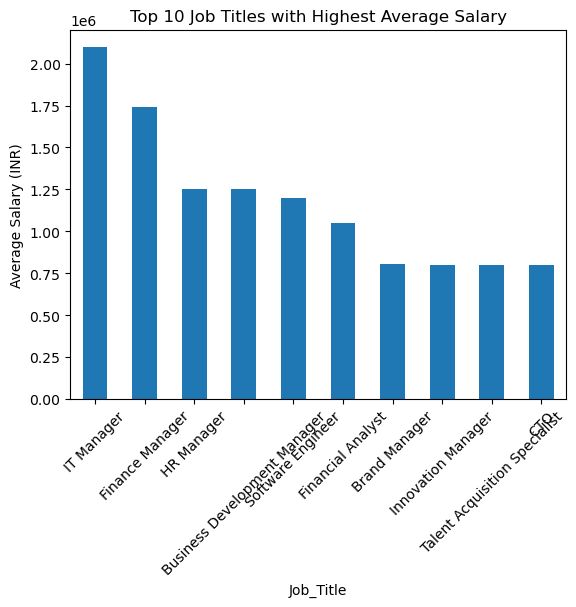

In [26]:
df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False).head(10)
df.groupby('Job_Title')['Salary_INR'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Job Titles with Highest Average Salary")
plt.ylabel("Average Salary (INR)")
plt.xticks(rotation=45)
plt.show()